<a href="https://colab.research.google.com/github/MuhammadNoman2/Project/blob/main/Diabetes%20Prediction%20using%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
pip install xgb

ERROR: Could not find a version that satisfies the requirement xgb (from versions: none)
ERROR: No matching distribution found for xgb


In [54]:
# Step 1: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,RobustScaler,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,cohen_kappa_score,matthews_corrcoef
import warnings
warnings.simplefilter(action = "ignore")

ImportError: cannot import name 'xgb' from 'xgboost' (/usr/local/lib/python3.10/dist-packages/xgboost/__init__.py)

In [2]:
df = pd.read_csv('Diabetes_dataset.csv')

In [3]:
df.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Polydipsia,Polyuria,partial_paresis,Gender,Outcome
0,6,148,35,0,33.6,50,Yes,No,No,Male,1
1,1,85,29,0,26.6,31,No,No,Yes,Male,0
2,8,183,0,0,23.3,32,No,Yes,No,Male,1
3,1,89,23,94,28.1,21,No,No,No,Male,0
4,0,137,35,168,43.1,33,Yes,Yes,Yes,Male,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pregnancies      768 non-null    int64  
 1   Glucose          768 non-null    int64  
 2   SkinThickness    768 non-null    int64  
 3   Insulin          768 non-null    int64  
 4   BMI              768 non-null    float64
 5   Age              768 non-null    int64  
 6   Polydipsia       768 non-null    object 
 7   Polyuria         768 non-null    object 
 8   partial_paresis  768 non-null    object 
 9   Gender           768 non-null    object 
 10  Outcome          768 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 66.1+ KB


In [5]:
df.describe()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,20.536458,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,15.952218,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,32.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,99.000000,846.000000,67.100000,81.000000,1.000000


In [6]:
df.shape

(768, 11)

In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
# 3.5 Visualize Numeric & Categorical features using histogram
numeric_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(include=[object])

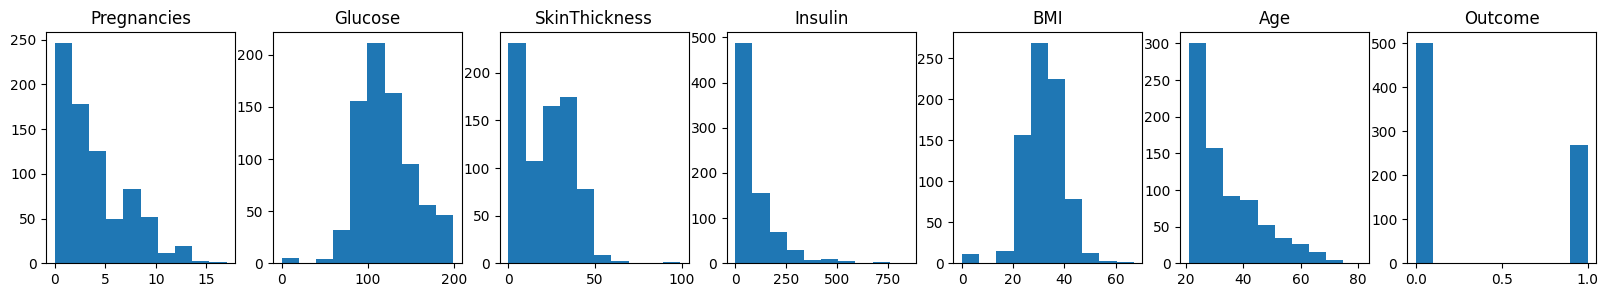

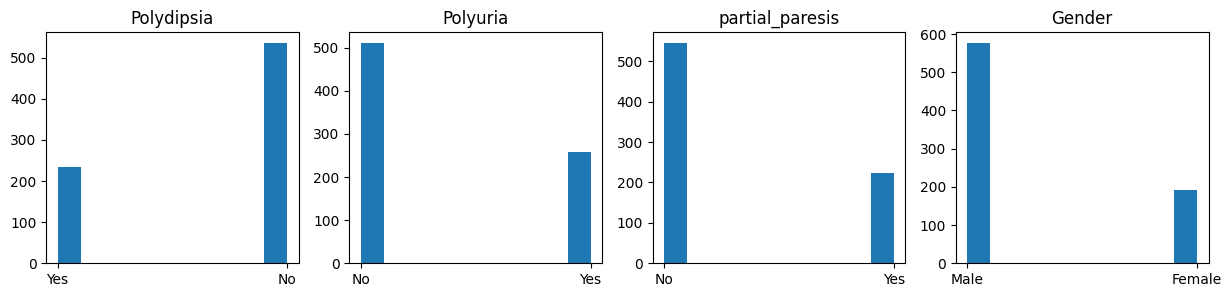

In [9]:
# Display Numeric Features using Histograms side by side
num_cols = numeric_features.columns
num_cols_count = len(num_cols)

fig, axs = plt.subplots(1, num_cols_count, figsize=(20, 3))  # Adjust the figsize as needed

for i, column in enumerate(num_cols):
    axs[i].hist(df[column])
    axs[i].set_title(column)

plt.show()

# Display Categorical Features using Histograms side by side
num_cols = categorical_features.columns
num_cols_count = len(num_cols)

fig, axs = plt.subplots(1, num_cols_count, figsize=(15, 3))  # Adjust the figsize as needed

for i, column in enumerate(num_cols):
    axs[i].hist(df[column])
    axs[i].set_title(column)

plt.show()

In [10]:
df[['Glucose','SkinThickness','Insulin','BMI']] = df[['Glucose','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
df.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Polydipsia,Polyuria,partial_paresis,Gender,Outcome
0,6,148.0,35.0,NaN,33.6,50,Yes,No,No,Male,1
1,1,85.0,29.0,NaN,26.6,31,No,No,Yes,Male,0
2,8,183.0,NaN,NaN,23.3,32,No,Yes,No,Male,1
3,1,89.0,23.0,94.0,28.1,21,No,No,No,Male,0
4,0,137.0,35.0,168.0,43.1,33,Yes,Yes,Yes,Male,1


In [12]:
df.isnull().sum()

Pregnancies          0
Glucose              5
SkinThickness      227
Insulin            374
BMI                 11
Age                  0
Polydipsia           0
Polyuria             0
partial_paresis      0
Gender               0
Outcome              0
dtype: int64

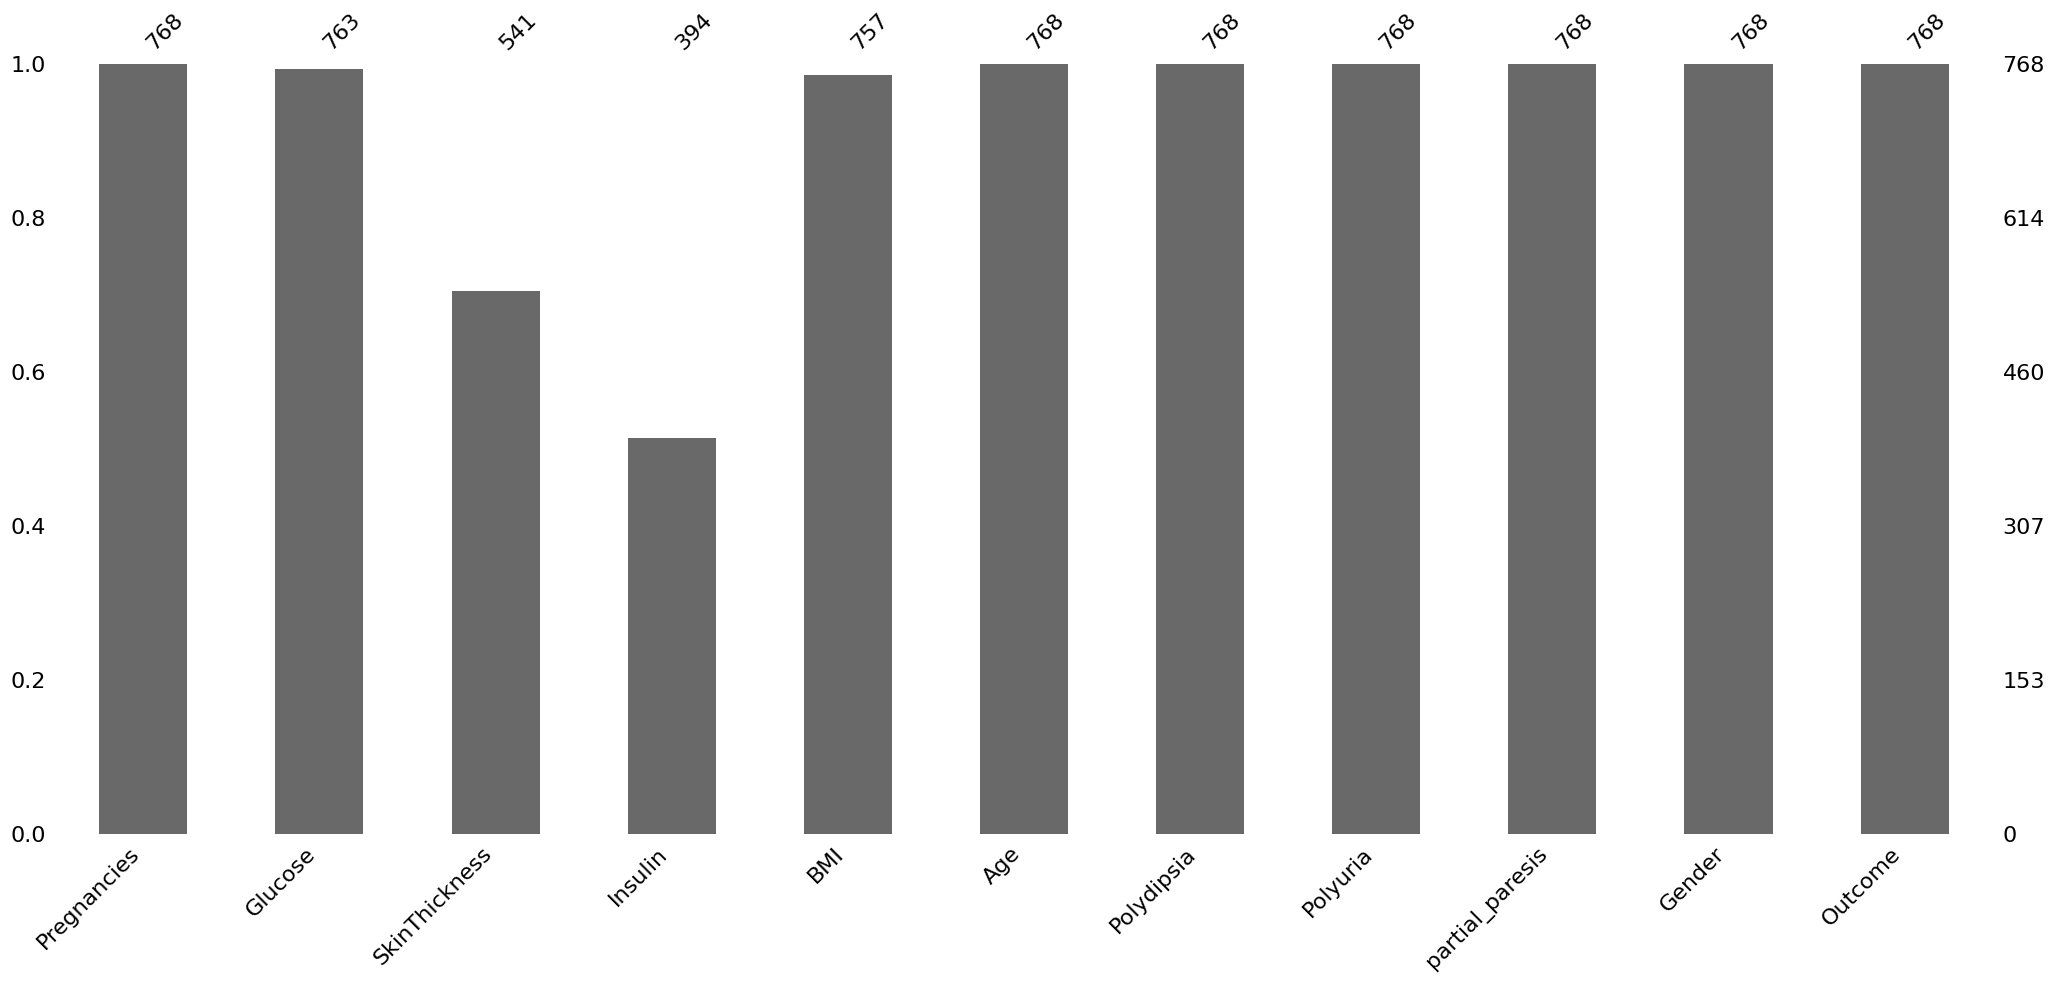

In [13]:
# Plotting
import missingno as msno
msno.bar(df);

In [14]:
label_encoder = LabelEncoder()
for column in categorical_features.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [15]:
df.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Polydipsia,Polyuria,partial_paresis,Gender,Outcome
0,6,148.0,35.0,NaN,33.6,50,1,0,0,1,1
1,1,85.0,29.0,NaN,26.6,31,0,0,1,1,0
2,8,183.0,NaN,NaN,23.3,32,0,1,0,1,1
3,1,89.0,23.0,94.0,28.1,21,0,0,0,1,0
4,0,137.0,35.0,168.0,43.1,33,1,1,1,1,1


In [16]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [17]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [18]:
df.isnull().sum()

Pregnancies        0
Glucose            0
SkinThickness      0
Insulin            0
BMI                0
Age                0
Polydipsia         0
Polyuria           0
partial_paresis    0
Gender             0
Outcome            0
dtype: int64

In [19]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
SkinThickness yes
Insulin yes
BMI yes
Age yes
Polydipsia no
Polyuria no
partial_paresis no
Gender no
Outcome no


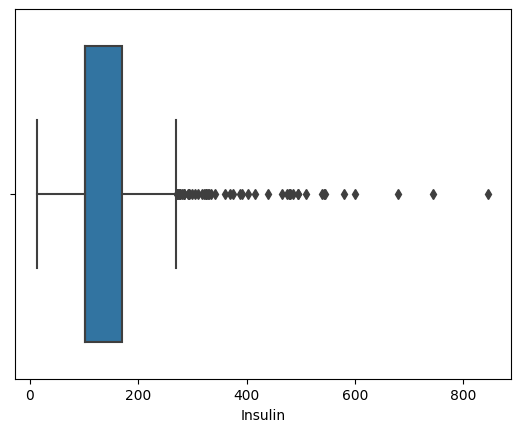

In [20]:
sns.boxplot(x = df["Insulin"]);

In [21]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

In [22]:
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["BMI"] > upper,"BMI"] = upper

In [23]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Age"] > upper,"Age"] = upper

In [24]:
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["SkinThickness"] > upper,"SkinThickness"] = upper

In [25]:
Q1 = df.Pregnancies.quantile(0.25)
Q3 = df.Pregnancies.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Pregnancies"] > upper,"Pregnancies"] = upper

In [26]:
 #We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [27]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-2.26834374, -1.86315639, -1.80153963, -1.79087358, -1.70665579,
       -1.70302986, -1.66829563, -1.6184836 , -1.59975696, -1.57907802,
       -1.56610127, -1.5466434 , -1.53743167, -1.53592149, -1.5124943 ,
       -1.50881223, -1.50525252, -1.50437677, -1.50059267, -1.48494126,
       -1.48198565, -1.47811231, -1.47303189, -1.46775274, -1.45712966,
       -1.44659148, -1.43870269, -1.43544335, -1.43456662, -1.42245632])

In [28]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.6184836045055224

In [29]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [30]:
# The size of the data set was examined.
df.shape

(760, 11)

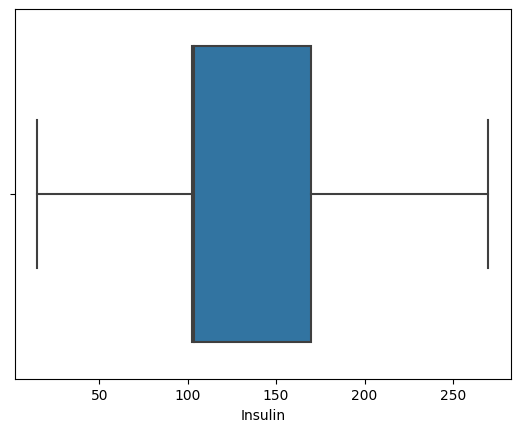

In [31]:
sns.boxplot(x = df["Insulin"]);

In [32]:
X = df.drop('Outcome' ,axis=1)
y = df['Outcome']

In [33]:
X.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Polydipsia,Polyuria,partial_paresis,Gender
0,6.0,148.0,35.0,169.5,33.6,50.0,1,0,0,1
1,1.0,85.0,29.0,102.5,26.6,31.0,0,0,1,1
2,8.0,183.0,32.0,169.5,23.3,32.0,0,1,0,1
3,1.0,89.0,23.0,94.0,28.1,21.0,0,0,0,1
4,0.0,137.0,35.0,168.0,43.1,33.0,1,1,1,1


In [34]:
scaler = MinMaxScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [35]:
X.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Polydipsia,Polyuria,partial_paresis,Gender
0,0.444444,0.643357,0.788732,0.605882,0.480499,0.637363,1.0,0.0,0.0,1.0
1,0.074074,0.202797,0.619718,0.343137,0.262090,0.219780,0.0,0.0,1.0,1.0
2,0.592593,0.888112,0.704225,0.605882,0.159126,0.241758,0.0,1.0,0.0,1.0
3,0.074074,0.230769,0.450704,0.309804,0.308892,0.000000,0.0,0.0,0.0,1.0
4,0.000000,0.566434,0.788732,0.600000,0.776911,0.263736,1.0,1.0,1.0,1.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [38]:
svm_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, svm_pred)
# Precision, Recall, F1-Score
precision = precision_score(y_test, svm_pred, average='weighted')
recall = recall_score(y_test, svm_pred, average='weighted')
f1 = f1_score(y_test, svm_pred, average='weighted')

# F1-Recalsvm
f1_recall = 2 * (precision * recall) / (precision + recall)

# Kappa and Matthews Correlation Coefficient
kappa = cohen_kappa_score(y_test, svm_pred)
mcc = matthews_corrcoef(y_test, svm_pred)
print('SVM Precision = ',precision)
print('SVM recall = ',recall)
print('SVM F1-score = ',f1)
print('SVM F1-recall = ',f1_recall)
print('SVM Kappa = ',kappa)
print('SVM MCC = ',mcc)

SVM Precision =  0.868421052631579
SVM recall =  0.868421052631579
SVM F1-score =  0.868421052631579
SVM F1-recall =  0.868421052631579
SVM Kappa =  0.6660074708855197
SVM MCC =  0.6660074708855197


In [39]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [40]:
knn_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, knn_pred)
print('KNN Accuracy = ',accuracy)

KNN Accuracy =  0.8421052631578947


In [41]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)



GradientBoostingClassifier()

In [42]:
gb_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, gb_pred)
# Confusion Matrix
cm = confusion_matrix(y_test, gb_pred)
# Precision, Recall, F1-Score
precision = precision_score(y_test, gb_pred, average='weighted')
recall = recall_score(y_test, gb_pred, average='weighted')
f1 = f1_score(y_test, gb_pred, average='weighted')

# F1-Recalsvm
f1_recall = 2 * (precision * recall) / (precision + recall)

# Kappa and Matthews Correlation Coefficient
kappa = cohen_kappa_score(y_test, gb_pred)
mcc = matthews_corrcoef(y_test, gb_pred)
print('GradientBoosting Accuracy = ',accuracy)
print(' Precision = ',precision)
print(' recall = ',recall)
print(' F1-score = ',f1)
print(' F1-recall = ',f1_recall)
print(' Kappa = ',kappa)
print(' MCC = ',mcc)
print(' Confusion matrix = ',cm)


GradientBoosting Accuracy =  0.9539473684210527
 Precision =  0.9536889097744361
 recall =  0.9539473684210527
 F1-score =  0.9537663499389563
 F1-recall =  0.9538181215889371
 Kappa =  0.8821966341895483
 MCC =  0.882321587273842
 Confusion matrix =  [[108   3]
 [  4  37]]


In [43]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [44]:
nb_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, nb_pred)
print('Naive Baysian Accuracy = ',accuracy)

Naive Baysian Accuracy =  0.8486842105263158


In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print('Logistic Regression Accuracy = ',accuracy)


Logistic Regression Accuracy =  0.8223684210526315


In [47]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print('Random Forest Accuracy = ',rf_accuracy)

Random Forest Accuracy =  0.9342105263157895


In [49]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy = ", dt_accuracy)

Decision Tree Accuracy =  0.881578947368421


In [56]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [57]:
xgb_model = xgb_model.predict(X_test)
xgb_model_accuracy = accuracy_score(y_test, xgb_model)
print("XGB accuracy = ", xgb_model_accuracy)

XGB accuracy =  0.9342105263157895


In [93]:
# XGBoost Classifier
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(xgb_model, param_grid=xgb_param_grid, cv=3, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2, 1, 10],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [94]:
# Print the best parameters and the corresponding accuracy
print("\nXGBoost Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost Training Accuracy:", xgb_grid_search.best_score_)


XGBoost Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
XGBoost Training Accuracy: 0.881537661155278


In [95]:
xgb_test_preds = xgb_grid_search.predict(X_test)

In [61]:
print("XGBoost Test Accuracy:", accuracy_score(y_test, xgb_test_preds))

XGBoost Test Accuracy: 0.9473684210526315


In [62]:
# Random Forest Classifier with a simplified hyperparameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'sqrt']
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 15],
                         'max_features': ['auto', 'sqrt', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [63]:
# Print the best parameters and the corresponding accuracy
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Training Accuracy:", rf_grid_search.best_score_)

Random Forest Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Training Accuracy: 0.8766359394560146


In [64]:
rf_test_preds = rf_grid_search.predict(X_test)

print("\nRandom Forest Test Accuracy:", accuracy_score(y_test, rf_test_preds))



Random Forest Test Accuracy: 0.9473684210526315


In [65]:

# Decision Tree Classifier
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt_model = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(dt_model, param_grid=dt_param_grid, cv=3, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [66]:
# Print the best parameters and the corresponding accuracy
print("\nDecision Tree Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Training Accuracy:", dt_grid_search.best_score_)



Decision Tree Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Training Accuracy: 0.8371539124355785


In [67]:
dt_test_preds = dt_grid_search.predict(X_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, dt_test_preds))

Decision Tree Test Accuracy: 0.881578947368421


In [68]:
# Define the parameter grid for Logistic Regression
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Initialize GridSearchCV
lr_grid_search = GridSearchCV(lr_model, param_grid=lr_param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
lr_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [69]:
#Print the best parameters and corresponding accuracy
print("Logistic Regression Best Parameters:", lr_grid_search.best_params_)
print("Logistic Regression Training Accuracy:", lr_grid_search.best_score_)


Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Training Accuracy: 0.7927620348241721


In [70]:
y_pred = lr_grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Test Accuracy:", test_accuracy)

Logistic Regression Test Accuracy: 0.8355263157894737


In [71]:
# Support Vector Machine (SVM) Hyperparameter Tuning
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

svm_model = SVC()
svm_grid_search = GridSearchCV(svm_model, param_grid=svm_param_grid, cv=3, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [72]:
# Print the best parameters and corresponding accuracy
print("\nSupport Vector Machine (SVM) Best Parameters:", svm_grid_search.best_params_)
print("SVM Training Accuracy:", svm_grid_search.best_score_)


Support Vector Machine (SVM) Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
SVM Training Accuracy: 0.8240176234372205


In [73]:
svm_test_preds = svm_grid_search.predict(X_test)
print("\nSupport Vector Machine (SVM) Test Accuracy:", accuracy_score(y_test, svm_test_preds))


Support Vector Machine (SVM) Test Accuracy: 0.881578947368421


In [74]:
# K-Nearest Neighbors (KNN) Hyperparameter Tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['brute', 'ball_tree', 'kd_tree', 'auto'],
}

knn_model = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_model, param_grid=knn_param_grid, cv=3, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['brute', 'ball_tree', 'kd_tree', 'auto'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [75]:
# Print the best parameters and corresponding accuracy
print("\nK-Nearest Neighbors (KNN) Best Parameters:", knn_grid_search.best_params_)
print("KNN Training Accuracy:", knn_grid_search.best_score_)


K-Nearest Neighbors (KNN) Best Parameters: {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}
KNN Training Accuracy: 0.7927539059324653


In [76]:
knn_test_preds = knn_grid_search.predict(X_test)
print("\nK-Nearest Neighbours (KNN) Test Accuracy:", accuracy_score(y_test, knn_test_preds))


K-Nearest Neighbours (KNN) Test Accuracy: 0.8421052631578947


In [77]:
# Gradient Boosting Hyperparameter Tuning
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gb_model = GradientBoostingClassifier()
gb_grid_search = GridSearchCV(gb_model, param_grid=gb_param_grid, cv=3, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [78]:
# Print the best parameters and corresponding accuracy
print("\nGradient Boosting Best Parameters:", gb_grid_search.best_params_)
print("Gradient Boosting Training Accuracy:", gb_grid_search.best_score_)



Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting Training Accuracy: 0.8782535889056886


In [79]:
gb_test_preds = gb_grid_search.predict(X_test)
accuracy = accuracy_score(y_test, gb_test_preds)
precision = precision_score(y_test, gb_test_preds)
kappa = cohen_kappa_score(y_test, gb_test_preds)
mcc = matthews_corrcoef(y_test, gb_test_preds)
print("Accuracy:",accuracy)
print("Precision ", precision)
print("Kappa Score ", kappa)
print("MCC score ", mcc)

Accuracy: 0.9605263157894737
Precision  0.9487179487179487
Kappa Score  0.8982370006694934
MCC score  0.8987542181763929


In [80]:
from sklearn.metrics import precision_score, cohen_kappa_score, matthews_corrcoef, recall_score, f1_score

def calculate_and_print_metrics(model, X_test, y_test, model_name):
    # Predictions
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Precision, Recall, F1-Score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # F1-Recall
    f1_recall = 2 * (precision * recall) / (precision + recall)

    # Kappa and Matthews Correlation Coefficient
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Print Metrics

    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"F1-Recall: {f1_recall:.4f}")
    print(f"Kappa: {kappa:.4f}")
    print(f"MCC: {mcc:.4f}")
    print("Confusion matrix =")
    print(cm)

# Example usage for a specific model (e.g., Random Forest)
rf_model = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
rf_model.fit(X_train, y_train)
calculate_and_print_metrics(rf_model, X_test, y_test, 'Random Forest')



Metrics for Random Forest:
Accuracy: 0.9474
Precision: 0.9474
Recall: 0.9474
F1-Score: 0.9474
F1-Recall: 0.9474
Kappa: 0.8664
MCC: 0.8664
Confusion matrix =
[[107   4]
 [  4  37]]
